## Solution A

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from unsupervised.K_Means import K_Means
from unsupervised.K_Medoids import K_Medoids
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm

X, y = make_blobs(
n_samples=500,
n_features=2,
centers=4,
cluster_std=1,
center_box=(-10.0, 10.0),
shuffle=True,
random_state=1,)


## Solution B
there are 4 clusters, 3 of them are so close between theirselfs, but the fourth cluster is farway from the others 3 clusters

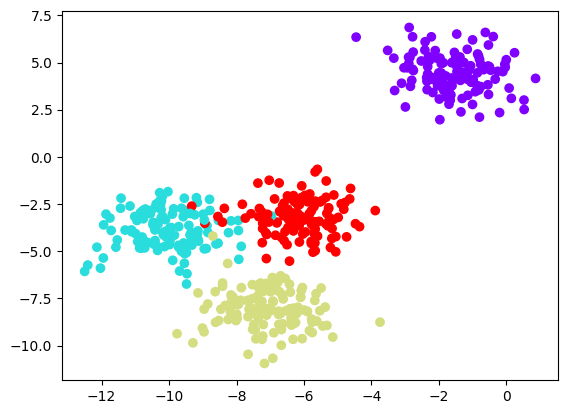

In [78]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')
plt.show()

## Solution C

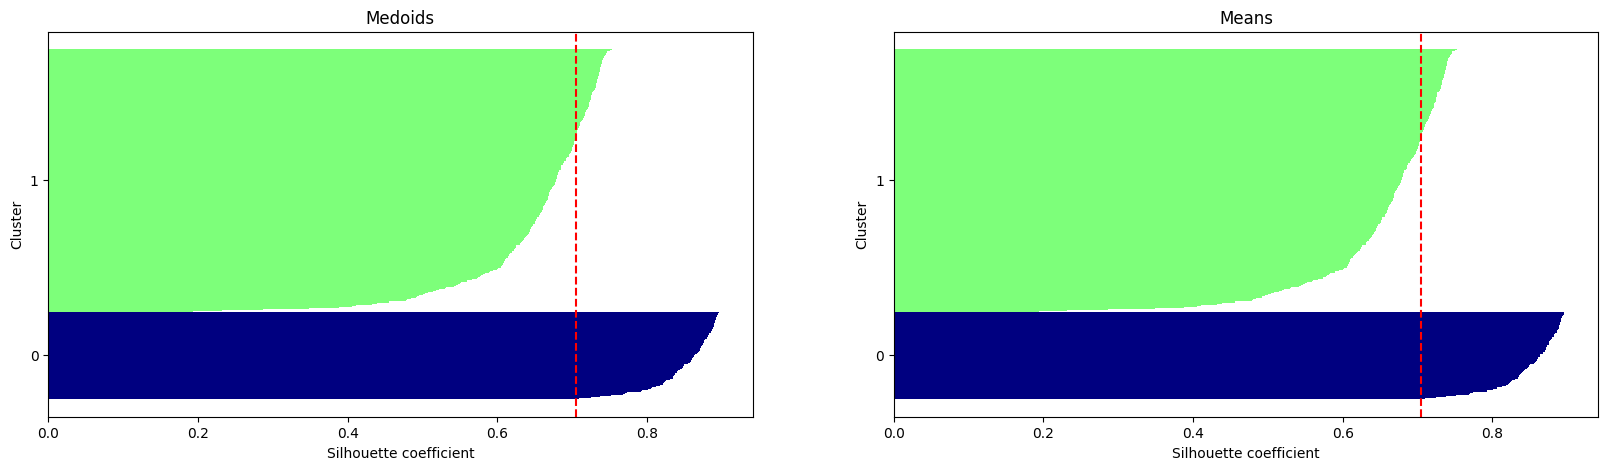

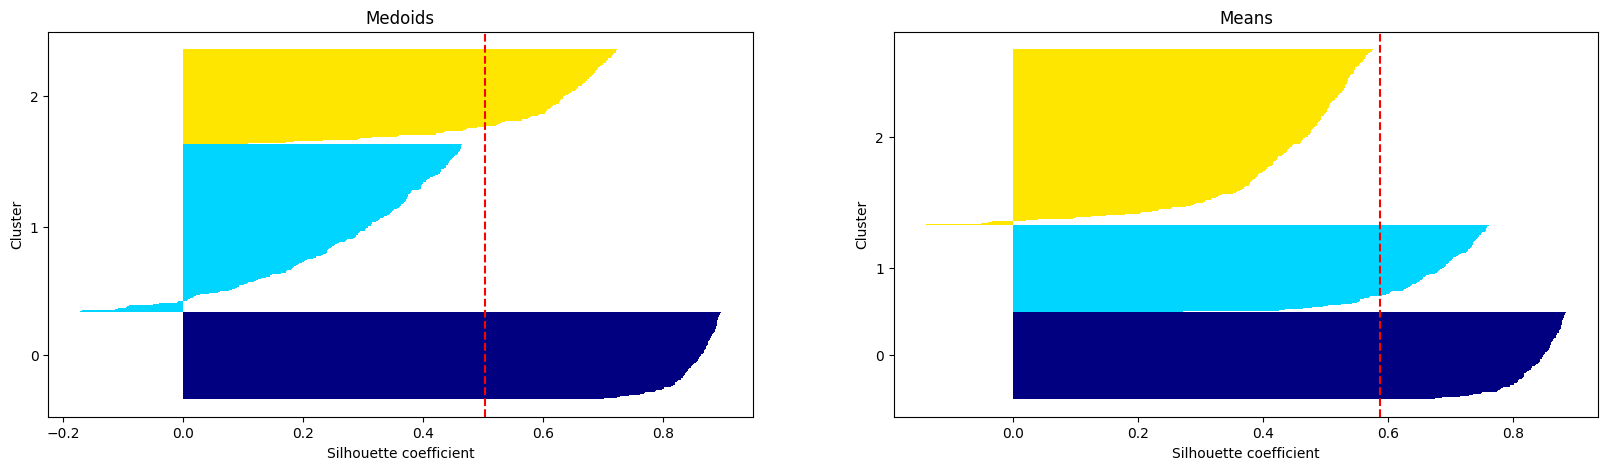

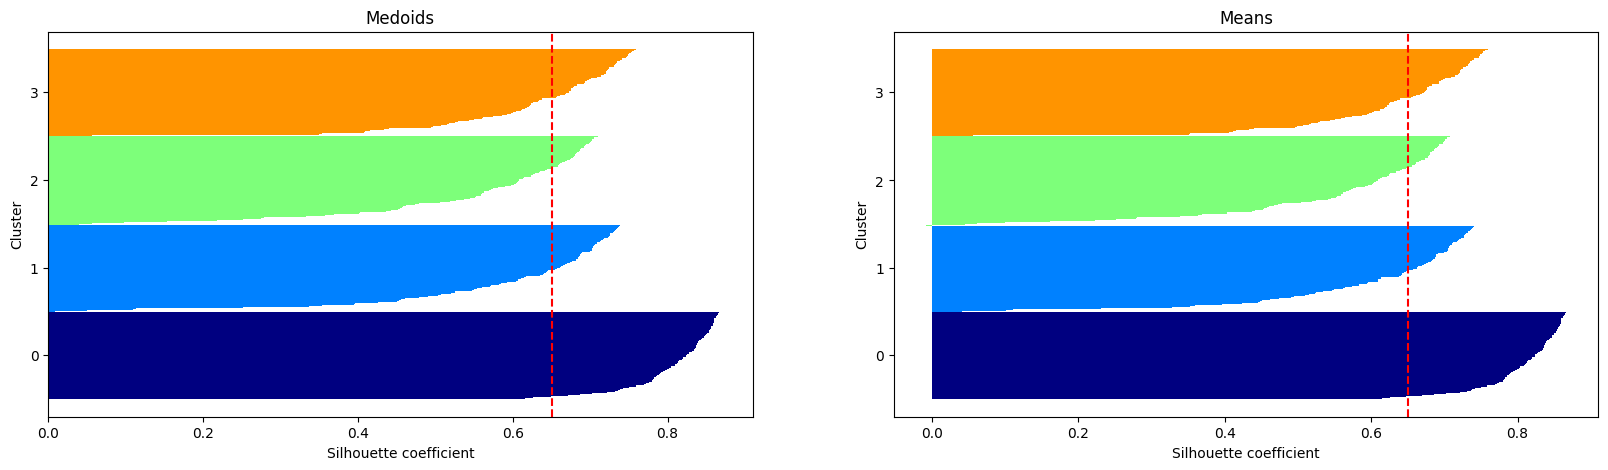

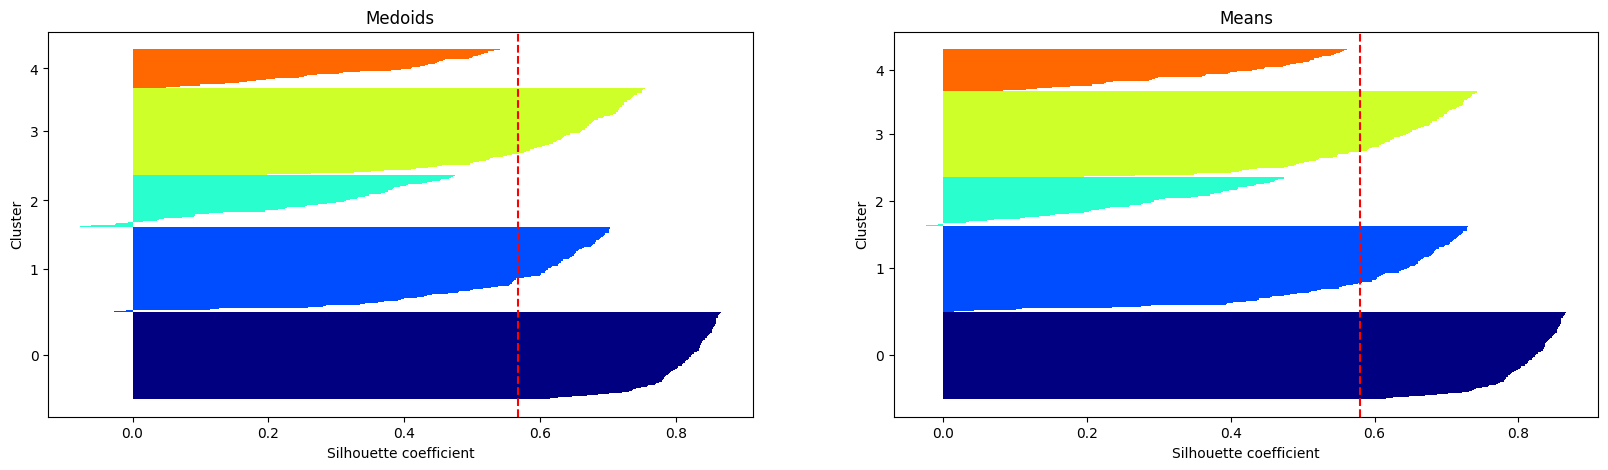

In [80]:
for n_clusters in range(2,6):
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    K_medoids2=K_Medoids()
    labels=K_medoids2.fit_transform(X=X,K=n_clusters,max_iters=1000)
    silhouette_vals = silhouette_samples(X, labels, metric='euclidean')
    silhouette_avg = silhouette_score(X, labels, metric='euclidean')
    y_lower, y_upper = 0, 0
    yticks = []
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        axs[0].barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_lower + y_upper) / 2.)
        y_lower += len(cluster_silhouette_vals)
    axs[0].axvline(silhouette_avg, color="red", linestyle="--")
    axs[0].set_yticks(yticks,np.unique(labels))
    axs[0].set_ylabel('Cluster')
    axs[0].set_xlabel('Silhouette coefficient')
    axs[0].set_title('Medoids')

    K_means=K_Means()
    labels=K_means.fit_transform(X=X,K=n_clusters,max_iters=1000)
    silhouette_vals = silhouette_samples(X, labels, metric='euclidean')
    silhouette_avg = silhouette_score(X, labels, metric='euclidean')
    y_lower, y_upper = 0, 0
    yticks = []
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        axs[1].barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_lower + y_upper) / 2.)
        y_lower += len(cluster_silhouette_vals)
    axs[1].axvline(silhouette_avg, color="red", linestyle="--")
    axs[1].set_yticks(yticks,np.unique(labels))
    axs[1].set_ylabel('Cluster')
    axs[1].set_xlabel('Silhouette coefficient')
    axs[1].set_title('Means')



## Solution D
to be honest i thougt that the clustering by 4 would be the besto option, but the SC is better just with 2, is important to think about wich one could represent better the bisness necesity because both options are good